In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

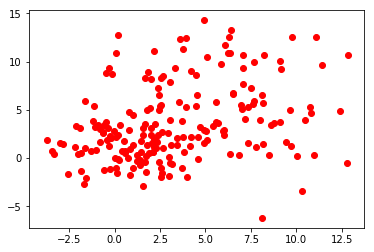

In [14]:
# We create some data
d1 = np.random.normal(loc=6, scale=3.5, size=200).reshape(100, 2)
d2 = np.random.normal(loc=1, scale=2, size=200).reshape(100, 2)

plt.scatter(d1[:,0], d1[:,1], c="r")
plt.scatter(d2[:,0], d2[:,1], c="r")

In [15]:
# We place all data in a single matrix
data = np.concatenate([d1, d2])

In [29]:
data.shape, data

((200, 2), array([[ 8.50465752e+00,  3.14518170e-01],
        [ 6.86329479e+00,  3.19464337e-01],
        [ 2.51929667e+00,  5.36761541e+00],
        [ 4.56194835e+00,  2.16791901e+00],
        [ 1.72868682e-01,  1.27747714e+01],
        [ 9.71942758e+00,  1.29398504e+00],
        [ 9.08680069e+00,  1.00285188e+01],
        [ 8.10008062e+00, -6.18383548e+00],
        [ 5.67373165e+00,  3.68764458e+00],
        [ 9.12445384e+00,  3.75320297e+00],
        [ 3.57582184e+00,  1.23070562e+01],
        [ 1.27844253e+01, -5.50579517e-01],
        [ 1.97809628e+00,  8.19995290e+00],
        [ 1.82077164e+00,  8.94314521e+00],
        [ 7.33257288e+00,  1.51597789e+00],
        [ 6.49608413e+00,  6.72543158e+00],
        [ 3.90546004e+00,  1.24435685e+01],
        [ 8.17954823e+00,  1.49588113e+00],
        [ 5.08921694e+00,  1.05165602e+01],
        [ 1.00695645e+00,  4.50325598e+00],
        [ 6.27575177e+00,  1.25214062e+01],
        [ 1.75360293e+00,  5.01531167e+00],
        [ 4.93849107e+

In [30]:
# We define our training function
def kmeans_train(dataset, k=2, threshold=1e-3):
    # Generate random centers
    minimum = np.min(dataset, axis=0)
    maximum = np.max(dataset, axis=0)
    
    centers = np.column_stack([ np.linspace(minimum[i], maximum[i], k) for i in range(minimum.shape[0]) ])
    
    # Improve centers
    error = 2*threshold
    while error > threshold:
        nearest = np.zeros(dataset.shape[0])
        
        # Find nearest neighbors to the centroids
        for i in range(dataset.shape[0]):
            point = dataset[i]
            distances = np.sqrt(np.sum( (centers - point)**2, axis=1 ))
            nearest[i] = np.argmin(distances)
            
        # Get new centroids
        newCenters = np.copy(centers)
        for i in range(centers.shape[0]):
            points = dataset[np.argwhere(nearest == i)[:,0]]
            newCenters[i] = np.mean(points, axis=0)
            
        # Calculate error
        error = np.sum(np.abs(centers - newCenters)) / centers.size
        centers = newCenters
        print(error)
    
    return centers
    
centers = kmeans_train(data, k=4)
print(centers)

1.506248273975681
0.7930221008991765
0.4279620706531058
0.45208349064226405
0.5296417701231791
0.3108940838651894
0.13267259885102273
0.05789534545008125
0.044863489523536915
0.04373435034832396
0.07522620901829899
0.023033142782333108
0.0
[[-0.81300438  1.53844403]
 [ 2.72575127  1.24873111]
 [ 8.15343957  3.15958565]
 [ 4.98854607  9.74035441]]


In [31]:
# Now we define the prediction function
def kmeans_test(centers, query):
    distances = np.sqrt(np.sum((query - centers) ** 2, axis=1))
    return np.argmin(distances)

kmeans_test(centers, [10,10])

3

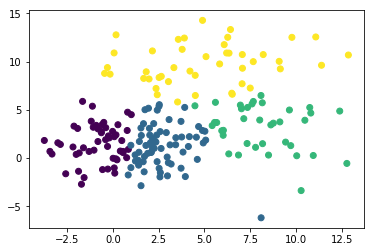

In [32]:
# We plot the classified points
colors = []
for i in data:
    colors.append(kmeans_test(centers, i))

plt.scatter(data[:,0], data[:,1], c=colors)

In [35]:
# We get the iris set
iris = load_iris()

In [41]:
# We place all we need in a single matrix
dataset = np.column_stack([iris.data, iris.target])
dataset

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [42]:
# We use our k-means with k=3
centers = kmeans_train(dataset=dataset[:,:-1], k=3)
centers

0.591357142857143
0.07322343510639273
0.05012197402062326
0.017443539091160365
0.011904716287807352
0.0


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [45]:
# We classify all points, and add our classification in a new column
result = np.zeros(dataset.shape[0])
for i in range(dataset.shape[0]):
    result[i] = kmeans_test(centers=centers, query=dataset[i][:-1])

dataset2 = np.column_stack([dataset, result])
dataset2

array([[5.1, 3.5, 1.4, 0.2, 0. , 0. ],
       [4.9, 3. , 1.4, 0.2, 0. , 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. , 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. , 0. ],
       [5. , 3.6, 1.4, 0.2, 0. , 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. , 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. , 0. ],
       [5. , 3.4, 1.5, 0.2, 0. , 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. , 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. , 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. , 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. , 0. ],
       [4.8, 3. , 1.4, 0.1, 0. , 0. ],
       [4.3, 3. , 1.1, 0.1, 0. , 0. ],
       [5.8, 4. , 1.2, 0.2, 0. , 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. , 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. , 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. , 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. , 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. , 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. , 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. , 0. ],
       [4.6, 3.6, 1. , 0.2, 0. , 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. , 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. , 0. ],
       [5. , 3. , 1.6, 0.

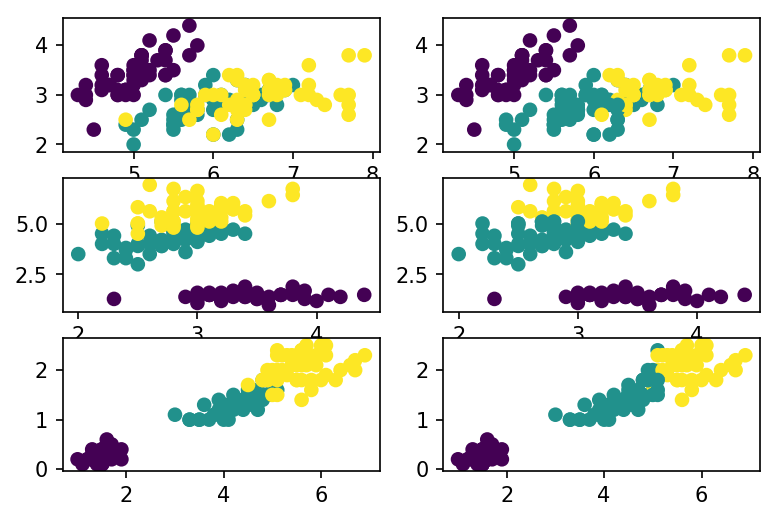

In [53]:
# Now we plot the correct classification and the clustered one
fig, ax = plt.subplots(ncols=2, nrows=3, dpi=150)
ax[0,0].scatter(dataset2[:,0], dataset2[:,1], c=dataset2[:,-2])
ax[0,1].scatter(dataset2[:,0], dataset2[:,1], c=dataset2[:,-1])

ax[1,0].scatter(dataset2[:,1], dataset2[:,2], c=dataset2[:,-2])
ax[1,1].scatter(dataset2[:,1], dataset2[:,2], c=dataset2[:,-1])

ax[2,0].scatter(dataset2[:,2], dataset2[:,3], c=dataset2[:,-2])
ax[2,1].scatter(dataset2[:,2], dataset2[:,3], c=dataset2[:,-1])

### This is actually pretty good!